In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

from src.utils.paths import data_loc

# Loading the Data

In [7]:
df = pd.read_csv(data_loc)
df.head()

,Year,Country.Name,Country.Code,Country.GDP,Country.Population,Emissions.Production.CH4,Emissions.Production.N2O,Emissions.Production.CO2.Cement,Emissions.Production.CO2.Coal,Emissions.Production.CO2.Gas,Emissions.Production.CO2.Oil,Emissions.Production.CO2.Flaring,Emissions.Production.CO2.Other,Emissions.Production.CO2.Total,Emissions.Global Share.CO2.Cement,Emissions.Global Share.CO2.Coal,Emissions.Global Share.CO2.Gas,Emissions.Global Share.CO2.Oil,Emissions.Global Share.CO2.Flaring,Emissions.Global Share.CO2.Total
0,1992,Afghanistan,AFG,1.267754e+10,14485543,7.13,2.89,0.046,0.022,0.363,0.927,0.022,0.000000e+00,1.379,0.01,0.0,0.01,0.01,0.01,0.01
1,1993,Afghanistan,AFG,9.834581e+09,15816601,7.21,2.93,0.047,0.018,0.352,0.894,0.022,0.000000e+00,1.333,0.01,0.0,0.01,0.01,0.01,0.01
2,1994,Afghanistan,AFG,7.919857e+09,17075728,7.47,2.76,0.047,0.015,0.338,0.860,0.022,2.220446e-16,1.282,0.01,0.0,0.01,0.01,0.01,0.01
3,1995,Afghanistan,AFG,1.230753e+10,18110662,7.83,2.88,0.047,0.015,0.322,0.824,0.022,2.220446e-16,1.230,0.01,0.0,0.01,0.01,0.01,0.01
4,1996,Afghanistan,AFG,1.207013e+10,18853444,8.67,3.12,0.047,0.007,0.308,0.780,0.022,1.000000e-03,1.165,0.01,0.0,0.01,0.01,0.01,0.00


In [8]:
df.columns

Index(['Year', 'Country.Name', 'Country.Code', 'Country.GDP',
       'Country.Population', 'Emissions.Production.CH4',
       'Emissions.Production.N2O', 'Emissions.Production.CO2.Cement',
       'Emissions.Production.CO2.Coal', 'Emissions.Production.CO2.Gas',
       'Emissions.Production.CO2.Oil', 'Emissions.Production.CO2.Flaring',
       'Emissions.Production.CO2.Other', 'Emissions.Production.CO2.Total',
       'Emissions.Global Share.CO2.Cement', 'Emissions.Global Share.CO2.Coal',
       'Emissions.Global Share.CO2.Gas', 'Emissions.Global Share.CO2.Oil',
       'Emissions.Global Share.CO2.Flaring',
       'Emissions.Global Share.CO2.Total'],
      dtype='object')

In [9]:
rename = {'Country.Name': 'Country_Name', 
          'Country.Code':'Country_Code', 
          'Country.GDP': 'Country_GDP',
          'Country.Population': 'Country_Population', 
          'Emissions.Production.CH4': 'Emissions_Production_CH4',
          'Emissions.Production.N2O': 'Emissions_Production_N2O', 
          'Emissions.Production.CO2.Cement': 'Emissions_Production_CO2_Cement',
          'Emissions.Production.CO2.Coal': 'Emissions_Production_CO2_Coal', 
          'Emissions.Production.CO2.Gas': 'Emissions_Production_CO2_Gas',
          'Emissions.Production.CO2.Oil': 'Emissions_Production_CO2_Oil', 
          'Emissions.Production.CO2.Flaring': 'Emissions_Production_CO2_Flaring',
          'Emissions.Production.CO2.Other': 'Emissions_Production_CO2_Other', 
          'Emissions.Production.CO2.Total': 'Emissions_Production_CO2_Total',
          'Emissions.Global Share.CO2.Cement': 'Emissions_Global_Share_CO2_Cement', 
          'Emissions.Global Share.CO2.Coal': 'Emissions_Global_Share_CO2_Coal',
          'Emissions.Global Share.CO2.Gas': 'Emissions_Global_Share_CO2_Gas', 
          'Emissions.Global Share.CO2.Oil': 'Emissions_Global_Share_CO2_Oil',
          'Emissions.Global Share.CO2.Flaring': 'Emissions_Global_Share_CO2_Flaring',
          'Emissions.Global Share.CO2.Total': 'Emissions_Global_Share_CO2_Total'}

df.rename(columns = rename, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                2484 non-null   int64  
 1   Country_Name                        2484 non-null   object 
 2   Country_Code                        2484 non-null   object 
 3   Country_GDP                         2484 non-null   float64
 4   Country_Population                  2484 non-null   int64  
 5   Emissions_Production_CH4            2484 non-null   float64
 6   Emissions_Production_N2O            2484 non-null   float64
 7   Emissions_Production_CO2_Cement     2484 non-null   float64
 8   Emissions_Production_CO2_Coal       2484 non-null   float64
 9   Emissions_Production_CO2_Gas        2484 non-null   float64
 10  Emissions_Production_CO2_Oil        2484 non-null   float64
 11  Emissions_Production_CO2_Flaring    2484 no

In [11]:
df.describe()

,Year,Country_GDP,Country_Population,Emissions_Production_CH4,Emissions_Production_N2O,Emissions_Production_CO2_Cement,Emissions_Production_CO2_Coal,Emissions_Production_CO2_Gas,Emissions_Production_CO2_Oil,Emissions_Production_CO2_Flaring,Emissions_Production_CO2_Other,Emissions_Production_CO2_Total,Emissions_Global_Share_CO2_Cement,Emissions_Global_Share_CO2_Coal,Emissions_Global_Share_CO2_Gas,Emissions_Global_Share_CO2_Oil,Emissions_Global_Share_CO2_Flaring,Emissions_Global_Share_CO2_Total
count,2484.000000,2.484000e+03,2.484000e+03,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000
mean,2005.000000,7.909678e+11,6.264477e+07,71.834473,24.555829,10.616455,123.146344,58.088311,102.178861,3.370653,2.676818,300.077331,1.048998,1.059952,1.061023,0.951912,1.072999,1.020688
std,7.790449,1.984299e+12,1.834772e+08,150.453654,58.642876,53.019713,573.823617,158.775012,271.814395,7.851043,12.952656,939.940620,4.461195,4.545482,2.948671,2.537069,2.428396,3.089116
min,1992.000000,0.000000e+00,2.601550e+05,0.520000,0.110000,0.000000,0.000000,0.000000,0.366000,0.000000,0.000000,0.758000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1998.000000,6.144881e+10,5.074450e+06,7.460000,2.550000,0.542750,0.310250,2.552750,8.946750,0.000000,0.000000,21.525250,0.060000,0.000000,0.050000,0.080000,0.000000,0.080000
50%,2005.000000,2.248733e+11,1.540440e+07,22.835000,7.490000,1.830000,7.394000,12.499500,29.233000,0.241000,0.001000,60.908000,0.190000,0.060000,0.240000,0.280000,0.070000,0.220000
75%,2012.000000,6.050548e+11,4.884866e+07,66.032500,21.882500,6.286500,41.941750,55.053250,73.189500,2.583250,1.054000,220.066000,0.620000,0.360000,1.010000,0.690000,0.790000,0.722500
max,2018.000000,1.815162e+13,1.427648e+09,1161.420000,552.670000,786.745000,7493.455000,1641.041000,2608.477000,76.211000,171.537000,10289.989000,52.750000,49.930000,28.340000,24.010000,18.020000,28.210000


In [12]:
import pycountry_convert as pc

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

ModuleNotFoundError: No module named 'pycountry_convert'

In [ ]:
df['Continent'] = df["Country_Name"].apply(country_to_continent)

In [ ]:
def income_based_country_classification(country_name):
    high_income_countries = [
        'Australia',
        'Austria',
        'Bahrain',
        'Barbados',
        'Belgium',
        'Brunei Darussalam',
        'Canada',
        'Chile',
        'Croatia',
        'Cyprus',
        'Czechia',
        'Denmark',
        'Equatorial Guinea',
        'Estonia',
        'Finland',
        'France',
        'Germany',
        'Greece',
        'Hong Kong SAR',
        'Iceland',
        'Ireland',
        'Israel',
        'Italy',
        'Japan',
        'Kuwait',
        'Latvia',
        'Lithuania',
        'Luxembourg',
        'Malta',
        'Netherlands',
        'New Zealand',
        'North Macedonia',
        'Norway',
        'Oman',
        'Poland',
        'Portugal',
        'Qatar',
        'South Korea',
        'Russia',
        'Saudi Arabia',
        'Singapore',
        'Slovakia',
        'Slovenia',
        'Spain',
        'Sweden',
        'Switzerland',
        'Taiwan Province of China',
        'Trinidad and Tobago',
        'United Arab Emirates',
        'United Kingdom',
        'United States',
        'Uruguay'
    ]
        
    upper_middle_income_countries = [
        'Albania',
        'Algeria',
        'Angola',
        'Argentina',
        'Azerbaijan',
        'Belarus',
        'Bosnia and Herzegovina',
        'Botswana',
        'Brazil',
        'Bulgaria',
        'China',
        'Colombia',
        'Costa Rica',
        'Cuba',
        'Dominican Republic',
        'Ecuador',
        'Gabon',
        'Hungary',
        'Iran',
        'Iraq',
        'Jamaica',
        'Jordan',
        'Kazakhstan',
        'Lebanon',
        'Libya',
        'Malaysia',
        'Mauritius',
        'Mexico',
        'Montenegro',
        'Namibia',
        'Panama',
        'Peru',
        'Romania',
        'Serbia',
        'South Africa',
        'Thailand',
        'The former Yugoslav Republic of Macedonia',
        'Tunisia',
        'Turkey',
        'Turkmenistan',
        'Venezuela'
    ]
        
    lower_middle_income_countries = [
        'Armenia',
        'Bolivia',
        'Cameroon',
        'Cape Verde',
        'Congo',
        'Côte d\’Ivoire',
        'Djibouti',
        'Egypt',
        'El Salvador',
        'Georgia',
        'Ghana',
        'Guatemala',
        'Guyana',
        'Honduras',
        'India',
        'Indonesia',
        'Lesotho',
        'Mauritania',
        'Moldova',
        'Morocco',
        'Nicaragua',
        'Nigeria',
        'Pakistan',
        'Papua New Guinea',
        'Paraguay',
        'Philippines',
        'São Tomé and Principe',
        'Senegal',
        'Sri Lanka',
        'Sudan',
        'Syrian Arab Republic',
        'Ukraine',
        'Uzbekistan',
        'Vietnam',
        'Yemen',
        'Zambia'
    ]
        
    low_income_countries = [
        'Bangladesh',
        'Benin',
        'Burkina Faso',
        'Burundi',
        'Central African Republic',
        'Chad',
        'Comoros',
        'Democratic Republic of the Congo',
        'Eritrea',
        'Ethiopia',
        'Gambia, The',
        'Guinea',
        'Guinea-Bissau',
        'Haiti',
        'Kenya',
        'Kyrgyzstan',
        'Liberia',
        'Madagascar',
        'Malawi',
        'Mali',
        'Mozambique',
        'Myanmar',
        'Nepal',
        'Niger',
        'Rwanda',
        'Sierra Leone',
        'Somalia',
        'Tajikistan',
        'Tanzania',
        'Togo',
        'Uganda',
        'Zimbabwe',
        'Afghanistan',
        'Syria'
    ] 

    if country_name in high_income_countries:
        return "High income"
    elif country_name in upper_middle_income_countries:
        return "Upper middle income"
    elif country_name in lower_middle_income_countries:
        return "Lower middle income"
    elif country_name in low_income_countries:
        return "Low income"
    else:
        return np.nan

In [ ]:
df['Income_classification'] = df["Country_Name"].apply(income_based_country_classification)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                2484 non-null   int64  
 1   Country_Name                        2484 non-null   object 
 2   Country_Code                        2484 non-null   object 
 3   Country_GDP                         2484 non-null   float64
 4   Country_Population                  2484 non-null   int64  
 5   Emissions_Production_CH4            2484 non-null   float64
 6   Emissions_Production_N2O            2484 non-null   float64
 7   Emissions_Production_CO2_Cement     2484 non-null   float64
 8   Emissions_Production_CO2_Coal       2484 non-null   float64
 9   Emissions_Production_CO2_Gas        2484 non-null   float64
 10  Emissions_Production_CO2_Oil        2484 non-null   float64
 11  Emissions_Production_CO2_Flaring    2484 no

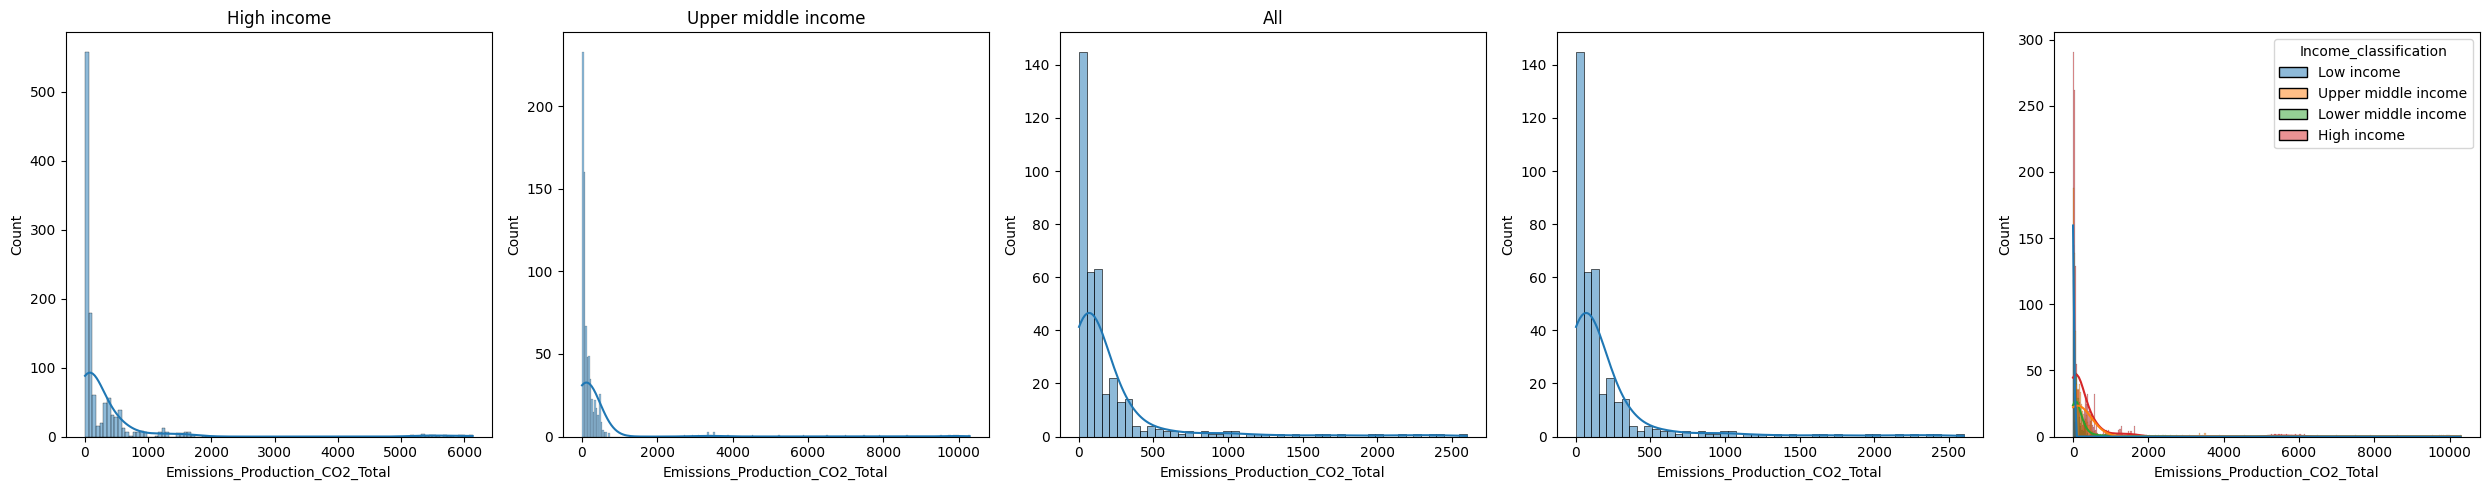

In [ ]:
High_income = df[df['Income_classification'] == 'High income']['Emissions_Production_CO2_Total']
Upper_middle_income = df[df['Income_classification'] == 'Upper middle income']['Emissions_Production_CO2_Total']
Lower_middle_income = df[df['Income_classification'] == 'Lower middle income']['Emissions_Production_CO2_Total']
Low_income = df[df['Income_classification'] == 'Lower middle income']['Emissions_Production_CO2_Total']

fig, axes = plt.subplots(1, 5, figsize=(25, 5))

sns.histplot(High_income, kde=True, ax=axes[0])
axes[0].set_title('High income')

sns.histplot(Upper_middle_income, kde=True, ax=axes[1])
axes[1].set_title('Upper middle income')

sns.histplot(Lower_middle_income, kde=True, ax=axes[2])
axes[2].set_title('Lower middle incomer')

sns.histplot(Low_income, kde=True, ax=axes[3])
axes[3].set_title('Low income')

sns.histplot(df, x='Emissions_Production_CO2_Total', kde=True, hue='Income_classification', ax=axes[4])
axes[4].set_title('All')

plt.tight_layout()
plt.show()

In [ ]:
spc_format = ols('Emissions_Production_CO2_Total ~ Income_classification', data=df[['Emissions_Production_CO2_Total', 'Income_classification']]).fit()

sm.stats.anova_lm(spc_format)

,df,sum_sq,mean_sq,F,PR(>F)
Income_classification,3.0,2.296914e+07,7.656379e+06,8.747195,0.000009
Residual,2480.0,2.170732e+09,8.752954e+05,NaN,NaN
